# Assignment 8: Moving Beyond Linearity

Dataset(s) needed:
Hitters data frame of the ISLR library SF-DAT-21

In [1]:
import pandas as pd

data = pd.read_csv('Hitters.csv')
data.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
6,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A
7,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.0,A
8,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.0,N
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.0,A


#### Replace missing values in the dataset by the mean

In [6]:
data = data.fillna(data.mean())
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,535.925882,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500000,N


#### Graph a scatter plot to visualize the relationship between Hits and Salary

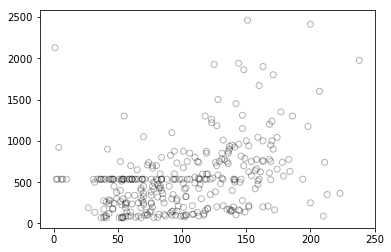

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(data.Hits, data.Salary, facecolor='None', edgecolor='k', alpha=0.3)
plt.show()

#### Apply Linear Regression on the Hitters data to predict 'Salary' depending only on 'Hits' as the independent variable. Print out the slope and intercept coefficients.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#TODO: Split the data into 70/30 train/test datasets
X = data['Hits']
y = data['Salary']
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.30, random_state = 1)

# TODO: Fit linear regression model
x = train_x.values.reshape(-1,1)
model = LinearRegression()
model.fit(x,train_y)
print(model.coef_)
print(model.intercept_)

[3.36599888]
178.20102765903033


#### Compute the RMSE of the model obtained above

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#TODO
test_x = test_x.values.reshape(-1,1)
pred = model.predict(test_x)

rms = sqrt(mean_squared_error(test_y, pred))
print(rms)

447.3080066672293


#### Graph the linear regression model obtained on the data

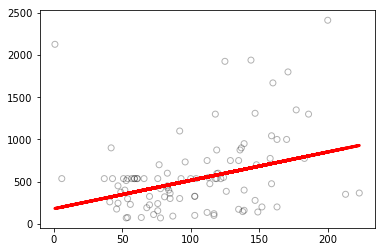

In [23]:
# Plot outputs
plt.scatter(test_x, test_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(test_x, model.predict(test_x), color='red',linewidth=3)
plt.show()

#### Construct a polynomial regression model with degree 2 to predict 'Salary' depending only on 'Hits' as the independent variable. Compute the RMSE and Plot your result.

[ 2.49493911e-02 -1.97255901e+00  4.08194902e+02]
435.18727709223435


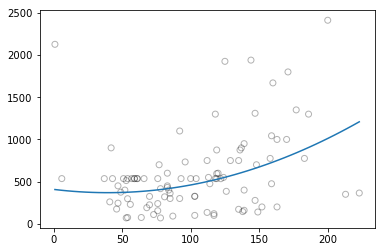

In [31]:
#TODO
# Generating weights for polynomial function with degree 2
weights = np.polyfit(train_x, train_y, 2)
print(weights)

# Generating model with the given weights
poly_model = np.poly1d(weights)

# Prediction on test set
pred = poly_model(test_x)

# RMSE
test_x = test_x.reshape(-1,1)
pred = poly_model(test_x)

rms = sqrt(mean_squared_error(test_y, pred))
print(rms)

# Visualisation
poly_regr = np.linspace(test_x.min(),test_x.max())
plot = poly_model(poly_regr)

plt.scatter(test_x, test_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(poly_regr, plot)
plt.show()

####  Create a cubic spline with 3 knots at 40, 100 and 150


457.30821697257846


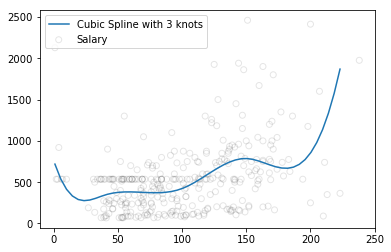

In [38]:
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Generating a cubic spline with 3 knots at 25, 40 and 60
transformed_x = dmatrix("bs(train, knots=(40,100,150), degree=3, include_intercept=False)", {"train": train_x},return_type='dataframe')

# Fitting GLM on the transformed dataset
fit_glm = sm.GLM(train_y, transformed_x).fit()

# Prediction
pred_glm = fit_glm.predict(dmatrix("bs(valid, knots=(40,100,150), include_intercept=False)", {"valid": test_x}, return_type='dataframe'))

# Calculating RMSE 
rms = sqrt(mean_squared_error(test_y, pred_glm))
print(rms)

#Visualization

lin = np.linspace(test_x.min(),test_x.max())
pred_glm = fit_glm.predict(dmatrix("bs(xp, knots=(40,100,150), include_intercept=False)", {"xp": lin}, return_type='dataframe'))

plt.scatter(data.Hits, data.Salary, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(lin, pred_glm, label='Cubic Spline with 3 knots')
plt.legend()
plt.show()

#### Create a natural cubic spline on the data to predict 'Salary' based on 'Hits'

In [ ]:
# Generate natural cubic spline
transformed_x = dmatrix("cr(train,df = 3)", {"train": train_x}, return_type='dataframe')
fit_spline = sm.GLM(train_y, transformed_x).fit()

# Calculate the  RMSE

pred_spline = fit_spline.predict(dmatrix("cr(valid, df=3)", {"valid": test_x}, return_type='dataframe'))
rms = sqrt(mean_squared_error(test_y, pred_spline))
print(rms)

